# Logistic Regression

In [38]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, classification_report)

%matplotlib inline

In [2]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=101,
)

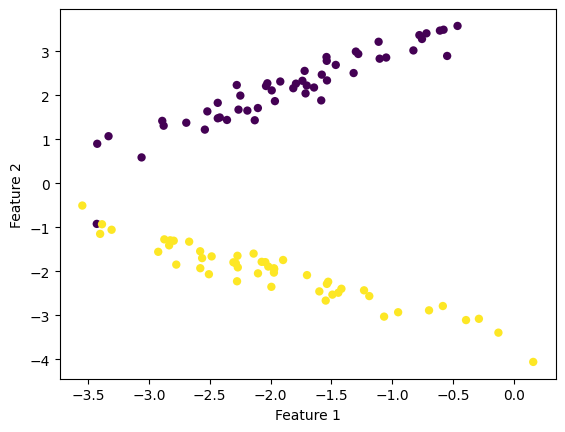

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidths=0, edgecolors=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Матрица неточности

* Кол-во образцов 10
* 4 - кол-во правильных 0-ей (ТР)
* 1 - кол-во неверных 0-ей (FN)
* 2 - кол-во неверных 1-ц (FP)
* 3 - кол-во правильных 1-ц (TN)
* Сумма по диагонали = 3 - неправильные классификации
* Сумма по главной диагонали  = 7 - правильные классификации

В идеальной классификации - все числа по главной диагонали

In [4]:
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

In [5]:
confusion_matrix(y_orig, y_pred)

array([[4, 2],
       [1, 3]], dtype=int64)

#### Тоже самое, только через тепловую карту

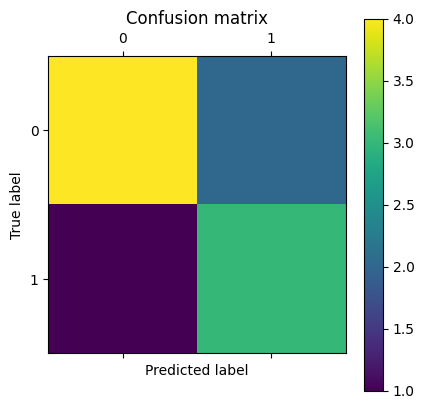

In [6]:
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Метрики

#### Accuracy 

Все правильные метки/кол-во меток. В данном случае 7/10

In [7]:
accuracy_score(y_orig, y_pred)

0.7

#### Presision 

$0 < \dfrac{TP}{(TP + FP)}< 1$

In [8]:
precision_score(y_orig, y_pred)

0.6

#### Recall

$0 < \dfrac{TP}{(TP + FN)}< 1$

In [9]:
recall_score(y_orig, y_pred)

0.75

#### F1 score

$ f1 = \dfrac{2*Presision*Recall}{Presision+Recall}$

In [10]:
f1_score(y_orig, y_pred)

0.6666666666666665

#### Быстрый отчет

In [11]:
print(classification_report(y_orig, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



### Вероятностный подход

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=.33, random_state=101)

In [13]:
y_test.dtype

dtype('float64')

1.0 - это вероятность, что наблюдение 100% относится к классу 1

0.0 - это вероятность, что наблюдение 100% относится к классу 0

In [14]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Вероятность принадлежности к классу 1. Она неправильна, т.к. есть данные меньше 0 и больше 1. Их нужно ограничить между 0 и 1.

In [16]:
lin_reg.predict(X_test)

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

Для решения этой задачи можно взять логит функцию

In [17]:
def model(x):
    return 1 / (1 + np.exp(-x))

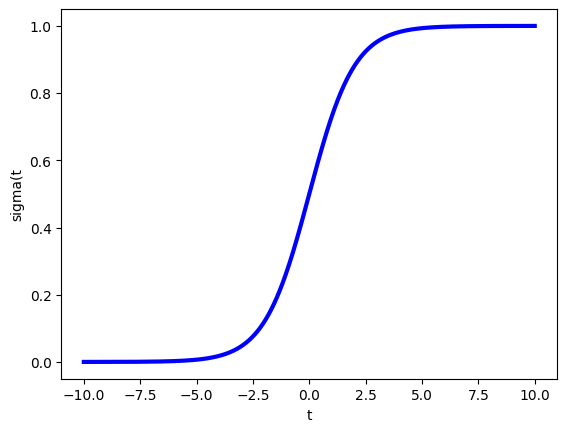

In [18]:
X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t')
plt.xlabel('t')
plt.show()

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))

y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



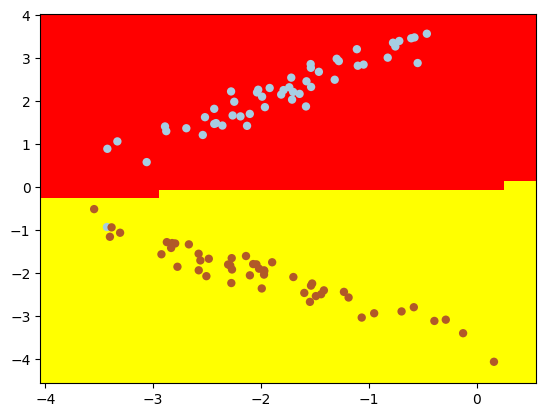

In [20]:
h = .2

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=plt.cm.autumn)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidths=0, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

#### Время для обучения и прогрнозирования

In [21]:
%timeit clf.fit(X, y)

4.89 ms ± 75.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%timeit clf.predict(X)

150 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [23]:
%timeit clf.predict_proba(X)

166 µs ± 4.66 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Multiclass

In [24]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=3,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=101,
)

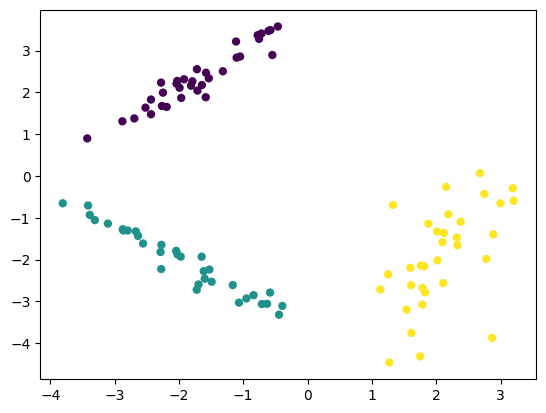

In [25]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidths=0, edgecolors=None)
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=.33, random_state=101)

In [28]:
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



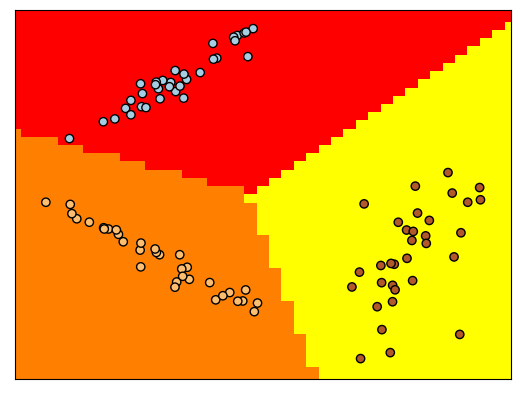

In [29]:
h = .2

x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=plt.cm.autumn)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

Финальный пример

Через Statsmodels

In [30]:
X, y = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    random_state=101,
)

In [32]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y, Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [33]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:                  0.3671
Time:                        16:04:53   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

Тоже самое, только с помощью Sklearn

* 1

In [34]:
clf = LogisticRegression(C=1E4, tol=1E-25, random_state=101)
clf.fit(X, y)

LogisticRegression(C=10000.0, random_state=101, tol=1e-25)

In [35]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
print(coeffs)

[0.4299012423792896, 0.06707352255219635, -0.7828068660348313, 0.12207683046267784, 0.2841051532346542, 0.1468922121339484, -0.34142784277931676, 0.05031700448004047, -0.13932062352365437, 0.11267792044953343, -0.47917035048372325]


* 2. Одинаковые веса получить трудно

In [42]:
clf = SGDClassifier(loss='log_loss', alpha=1E-4, n_iter_no_change=100, random_state=101)
clf.fit(X, y)

SGDClassifier(loss='log_loss', n_iter_no_change=100, random_state=101)

In [43]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_)
print(coeffs)

[0.4689946827992025, array([ 3.32015663e-04, -7.28242823e-01,  1.00417052e-01,  3.13634489e-01,
        1.24526417e-01, -3.14485817e-01,  3.12393243e-02, -1.88656772e-01,
        1.09255816e-01, -4.90561708e-01])]
